#**Breast Cancer Classification using Logistic Regression**




## Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

> At first we have imported the required libraries like pandas, numpy etc.

## Dataset Import

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.csv')

> Dataset has been imported using pandas read_csv method. Now we will check the information of the dataset.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


> Here we can see 'Bare Nuclei' is of object type which is undesirable. So let's check for which values it become object type instead on integer type.

In [4]:
data.head(25)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


> Now we can see for the index 23 there is a value '?'. It means there should be other values like this for which it become object type. Our next task will be to replace '?' with NaN as the value is undefined.

In [5]:
data["Bare Nuclei"].replace('?',np.nan, inplace=True)

> Again we will check the dataset information now.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


> Still we can see the datatype for 'Bare Nuclei' is object. So we need to convert it to numeric values.

In [7]:
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"])

> Now checking the datatype again.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


> We can see it has been succesfully converted to proper numeric format. Our next task is to replace all the NaN values with some other values like mean of the column or anything else like that. But we will do that after we split the dataset into train set and test set. Because if we take the mean before splitting the dataset then there will be information leakage from the test set to the train set which is totally undesirable.

In [9]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

> We have converted our dataset into independent variable (X) and our dependent variable (y). You can see that we have removed the first column 'Sample code number' as it is just a random number and it will not be useful to create any impact on classification. Now X and y can be used to create the train set and test set.

## Dataset Splitting into Train and Test Set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

> To create the train and test set we have used the Scikit Learn library and train_test_split class is actually doing the task for us. Here testing set size is 20%, so the training set size will be 80%.

## Preprocesing the Training Dataset (X_train)

> Now we will replace the NaN values in the training data using the mean of that column.

In [11]:
X_train[np.isnan(X_train[:,5]),5] = np.nanmean(X_train[:,5])

> Here nanmean will calculate mean values of column at index 5 which is 'Bare Nuclei'. But it will not take the NaN values to calculate the average as it will again produce NaN. 

> After that it will check all the row index which has NaN values at column index 5 and then it will replace all those NaN values at column index 5 with the calculated mean.

## Preprocesing the Testing Dataset (X_test)

> Preprocessing the testing data is necessary. Because if it has NaN values in any of it's rows, then our regression model will unable to find the correct class of it. So we will remove all the rows in the test set which has the NaN values. We will not use the mean here to replace the NaN values as we can not use other values in testing data set to predict the output.

In [12]:
y_test = y_test[~np.isnan(X_test[:,5])]

> At first we have deleted all the rows of y_test using X_test. Now we will delete rows from X_test.

In [13]:
X_test = X_test[~np.isnan(X_test[:,5]),:]

> Here we have not taken any rows of column index 5 which has NaN values.

> Now our training and testing set is ready. So we can proceed to the model training part.

## Logistic Regression Model Training

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

> To train the model we used LogisticRegression class from Skicit Learn library. Then we fit out model using X_train and y_train. Our model is ready now to predict the output of testing set.

## Prediction of Breast Cancer using the Testing Data

In [15]:
y_pred = classifier.predict(X_test)

> Here we stored the prediction output into y_pred array. Now we will create the confusion matrix to check the accuracy of our model.

## Confusion Matrix

> Now we will try to visualize our model using the confusion matrix plotted via HeatMap. In the cancer output class '2 means **benign**' and '4 means **malignant**'.

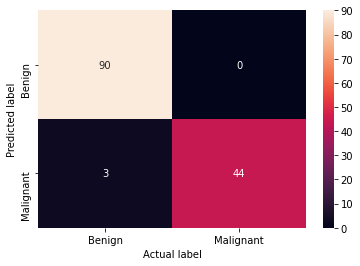

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
label_categories = ["Benign","Malignant"]
sns.heatmap(cm, annot = True, xticklabels = label_categories, yticklabels = label_categories)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()